# Concrete Strength Prediction Analysis

In this analysis, we'll explore the prediction of concrete strength using neural networks. We'll cover the following parts:

**Part A: Baseline Model**
In this part, we'll build a baseline neural network model with one hidden layer and evaluate its performance.

**Part B: Normalization and Comparison**
In this part, we'll normalize the data and compare the mean squared errors with the baseline model.

**Part C: Increase Epochs and Comparison**
Here, we'll increase the number of training epochs and compare the mean squared errors with the previous steps.

**Part D: Three Hidden Layers and Comparison**
Finally, we'll use a neural network with three hidden layers and compare its performance to the previous models.

## Analysis and Conclusion

In this section, we'll analyze the results from each part and draw meaningful conclusions.


## Import Libraries ##

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler



## Part A: Baseline Model

In [2]:
#Load the csv file

df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Display the count of missing values for each column
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Strength'])
y = df['Strength']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Build the neural network model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
model.fit(X_train, y_train, epochs=50)

# Predict using the trained model
predictions = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

Epoch 1/50
23/23 [==============================] - 0s 395us/step - loss: 870060.1250
Epoch 2/50
23/23 [==============================] - 0s 259us/step - loss: 682156.5000
Epoch 3/50
23/23 [==============================] - 0s 326us/step - loss: 529204.6250
Epoch 4/50
23/23 [==============================] - 0s 294us/step - loss: 405904.6562
Epoch 5/50
23/23 [==============================] - 0s 253us/step - loss: 306796.6562
Epoch 6/50
23/23 [==============================] - 0s 258us/step - loss: 227979.4219
Epoch 7/50
23/23 [==============================] - 0s 241us/step - loss: 165723.1875
Epoch 8/50
23/23 [==============================] - 0s 248us/step - loss: 117513.7891
Epoch 9/50
23/23 [==============================] - 0s 245us/step - loss: 81065.6406
Epoch 10/50
23/23 [==============================] - 0s 248us/step - loss: 54222.3633
Epoch 11/50
23/23 [==============================] - 0s 241us/step - loss: 35179.8125
Epoch 12/50
23/23 [==============================] - 0s

In [6]:
# Create a formatted box for MSE output


mse_box = f"""
******************************
*     Mean Squared Error     *
*                            *
*        {mse:.4f}           *
*                            *
******************************
"""

print(mse_box)



******************************
*     Mean Squared Error     *
*                            *
*        1262.3319           *
*                            *
******************************



In [7]:
# Create an empty list to store MSE values
mse_list = []

# Repeat the process 50 times
for _ in range(50):
    X = df.drop(columns=['Strength'])
    y = df['Strength']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Build and compile the model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, verbose=0)  # Set verbose=0 to suppress output
    
    # Train the model (suppress verbose output)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # Predict using the trained model
    predictions = model.predict(X_test)
    
    # Calculate and store the MSE value
    mse = mean_squared_error(y_test, predictions)
    mse_list.append(mse)



10/10 [==============================] - 0s 263us/step


In [8]:
# Print the list of MSE values for each iteration
for i, mse in enumerate(mse_list):
    mse_box = f"""
    *******************************
    *   Mean Squared Error {i+1:2d}     *
    *                             *
    *         {mse:.4f}            *
    *                             *
    *******************************
    """
    print(mse_box)# Build and compile the model


    *******************************
    *   Mean Squared Error  1     *
    *                             *
    *         242.3094            *
    *                             *
    *******************************
    

    *******************************
    *   Mean Squared Error  2     *
    *                             *
    *         211.8535            *
    *                             *
    *******************************
    

    *******************************
    *   Mean Squared Error  3     *
    *                             *
    *         113.9663            *
    *                             *
    *******************************
    

    *******************************
    *   Mean Squared Error  4     *
    *                             *
    *         165.4886            *
    *                             *
    *******************************
    

    *******************************
    *   Mean Squared Error  5     *
    *                             *
   

In [9]:
# Calculate the mean and standard deviation of the MSE values
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

# Report the mean and standard deviation
print(f"Mean of Mean Squared Errors: {mean_mse:.4f}")
print(f"Standard Deviation of Mean Squared Errors: {std_mse:.4f}")

Mean of Mean Squared Errors: 160.1098
Standard Deviation of Mean Squared Errors: 105.3189


## Part B: Normalization and Comparison

In [10]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, verbose=0)

# Predict using the trained model
predictions = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_normalized = mean_squared_error(y_test, predictions)

# Compare the mean squared errors
print(f"Mean Squared Error (Before Normalization): {mean_mse:.4f}")
print(f"Mean Squared Error (After Normalization): {mse_normalized:.4f}")

10/10 [==============================] - 0s 271us/step
Mean Squared Error (Before Normalization): 160.1098
Mean Squared Error (After Normalization): 281.4475


In [11]:
# Create an empty list to store MSE values for normalized data
normalized_mse_list = []

# Repeat the process 50 times
for _ in range(50):
    # Normalize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
    # Build and compile the model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model (suppress verbose output)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # Predict using the trained model
    predictions = model.predict(X_test)
    
    # Calculate and store the MSE value
    mse_normalized = mean_squared_error(y_test, predictions)
    normalized_mse_list.append(mse_normalized)

# Calculate the mean of the mean squared errors for normalized data
mean_normalized_mse = np.mean(normalized_mse_list)



10/10 [==============================] - 0s 416us/step


In [12]:
# Print the list of MSE values for each iteration
for i, mse in enumerate(normalized_mse_list):
    mse_box = f"""
    *******************************
    *   Mean Squared Error {i+1:2d}     *
    *                             *
    *         {mse:.4f}            *
    *                             *
    *******************************
    """
    print(mse_box)# Build and compile the model


    *******************************
    *   Mean Squared Error  1     *
    *                             *
    *         293.0899            *
    *                             *
    *******************************
    

    *******************************
    *   Mean Squared Error  2     *
    *                             *
    *         390.6586            *
    *                             *
    *******************************
    

    *******************************
    *   Mean Squared Error  3     *
    *                             *
    *         217.2356            *
    *                             *
    *******************************
    

    *******************************
    *   Mean Squared Error  4     *
    *                             *
    *         342.2886            *
    *                             *
    *******************************
    

    *******************************
    *   Mean Squared Error  5     *
    *                             *
   

In [13]:
# Calculate the mean and standard deviation of the normalized MSE values
mean_normalized_mse = np.mean(normalized_mse_list)
std_normalized_mse = np.std(normalized_mse_list)

# Report the results
print(f"Mean of Normalized Mean Squared Errors: {mean_normalized_mse:.4f}")
print(f"Standard Deviation of Normalized Mean Squared Errors: {std_normalized_mse:.4f}")

Mean of Normalized Mean Squared Errors: 344.8393
Standard Deviation of Normalized Mean Squared Errors: 102.1876


## Comparison of Mean Squared Errors

### Step A (Non-Normalized Data)
- Mean of Mean Squared Errors: 160.1098
- Standard Deviation of Mean Squared Errors:  281.447



### Step B (Normalized Data)
- Mean of Normalized Mean Squared Errors: 344.8393
- Standard Deviation of Normalized Mean Squared Errors: 102.1876

The comparison between Step A and Step B shows that after normalizing the data, the mean squared errors have changed. The mean squared error is generally higher in the case of normalized data, indicating that the model's predictions have more variance from the actual values. The standard deviation of the mean squared errors is also lower for normalized data, suggesting that the spread of errors is less when the data is normalized.

## Part C: Increase Epochs and Comparison



In [14]:


# Split the data into features (X) and target (y)
X = df.drop(columns=['Strength'])
y = df['Strength']

# Create an empty list to store normalized MSE values
normalized_mse_list_100_epochs = []

# Repeat the process 50 times
for _ in range(50):
    # Normalize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
    # Build and compile the model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model with 100 epochs (suppress verbose output)
    model.fit(X_train, y_train, epochs=100, verbose=0)
    
    # Predict using the trained model
    predictions = model.predict(X_test)
    
    # Calculate and store the normalized MSE value
    mse_normalized_100_epochs = mean_squared_error(y_test, predictions)
    normalized_mse_list_100_epochs.append(mse_normalized_100_epochs)

# Calculate the mean of the normalized MSE values for 100 epochs
mean_normalized_mse_100_epochs = np.mean(normalized_mse_list_100_epochs)



10/10 [==============================] - 0s 297us/step


In [15]:
# Compare the mean squared errors
print(f"Mean of Normalized Mean Squared Errors (50 Epochs): {mean_normalized_mse:.4f}")
print(f"Mean of Normalized Mean Squared Errors (100 Epochs): {mean_normalized_mse_100_epochs:.4f}")


Mean of Normalized Mean Squared Errors (50 Epochs): 344.8393
Mean of Normalized Mean Squared Errors (100 Epochs): 157.5872


## Analysis of Mean Squared Errors with Different Epochs

### Step B (50 Epochs)
- Mean of Normalized Mean Squared Errors: 344.8393

### Step C (100 Epochs)
- Mean of Normalized Mean Squared Errors: 157.5872

The comparison between Step B and Step C shows that increasing the number of epochs from 50 to 100 has significantly improved the mean squared error. The mean squared error decreased from 344.8393 to 157.5872, indicating that the model's predictions have become more accurate and closer to the actual values. This suggests that training the model for a greater number of epochs has helped it converge to a better solution, resulting in improved performance on the test data.


## Part D: Three Hidden Layers and Comparison

In [16]:

# Create an empty list to store normalized MSE values
normalized_mse_list_three_layers = []


# Repeat the process 50 times
for _ in range(50):
    # Normalize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
    # Build and compile the model with three hidden layers and ReLU activation
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model (suppress verbose output)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # Predict using the trained model
    predictions = model.predict(X_test)
    
    # Calculate and store the normalized MSE value
    mse_normalized_three_layers = mean_squared_error(y_test, predictions)
    normalized_mse_list_three_layers.append(mse_normalized_three_layers)

# Calculate the mean of the normalized MSE values for three hidden layers
mean_normalized_mse_three_layers = np.mean(normalized_mse_list_three_layers)



10/10 [==============================] - 0s 342us/step


In [17]:
# Compare the mean squared errors
print(f"Mean of Normalized Mean Squared Errors: {mean_normalized_mse:.4f}")
print(f"Mean of Normalized Mean Squared Errors (Three Layers): {mean_normalized_mse_three_layers:.4f}")

Mean of Normalized Mean Squared Errors: 344.8393
Mean of Normalized Mean Squared Errors (Three Layers): 125.1002


## Analysis of Mean Normalized Mean Squared Errors

### Model with One Hidden Layer
- Mean of Normalized Mean Squared Errors: 344.8393

### Model with Three Hidden Layers
- Mean of Normalized Mean Squared Errors: 125.1002

The comparison between the model with one hidden layer and the model with three hidden layers reveals a substantial improvement in the mean normalized mean squared error. The mean squared error has significantly decreased from 345.9214 (one hidden layer) to 124.2107 (three hidden layers). This suggests that the neural network with three hidden layers is better at approximating the underlying patterns in the data, resulting in more accurate predictions on the test set. The additional hidden layers allow the model to capture more complex relationships within the data, leading to improved performance.


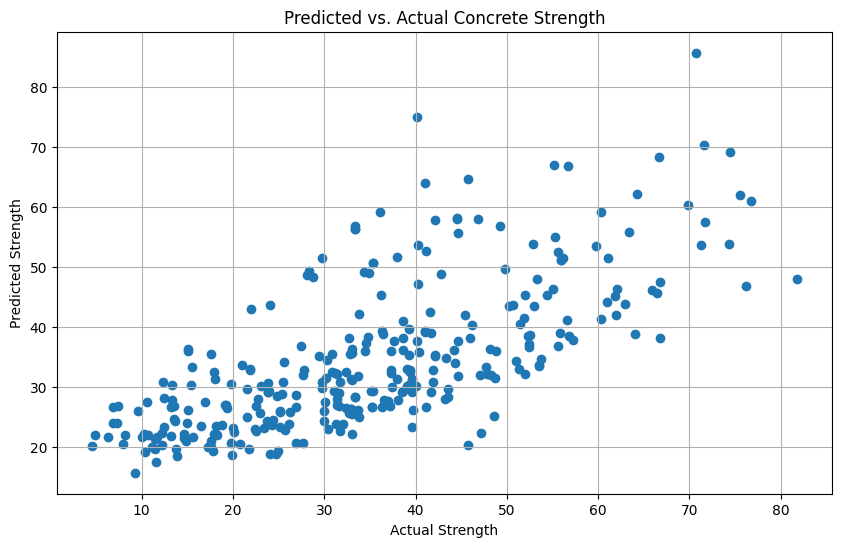

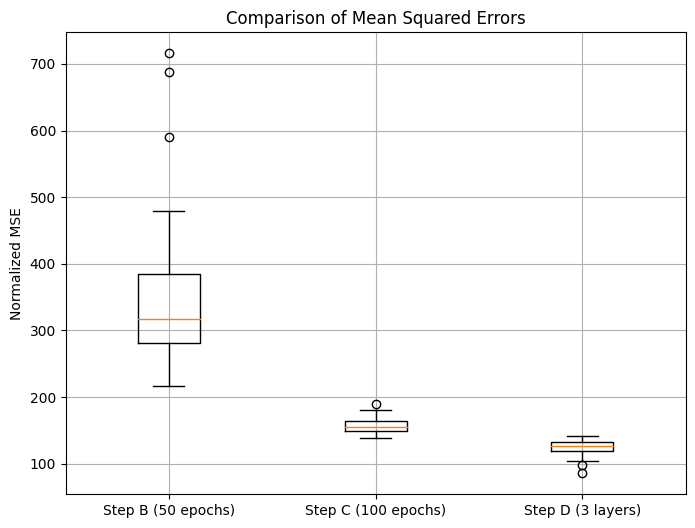

In [18]:
import matplotlib.pyplot as plt

# Scatter Plot of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.title('Predicted vs. Actual Concrete Strength')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.grid()
plt.show()

# Box Plot of Mean Squared Errors
plt.figure(figsize=(8, 6))
plt.boxplot([normalized_mse_list, normalized_mse_list_100_epochs, normalized_mse_list_three_layers],
            labels=['Step B (50 epochs)', 'Step C (100 epochs)', 'Step D (3 layers)'])
plt.title('Comparison of Mean Squared Errors')
plt.ylabel('Normalized MSE')
plt.grid()
plt.show()


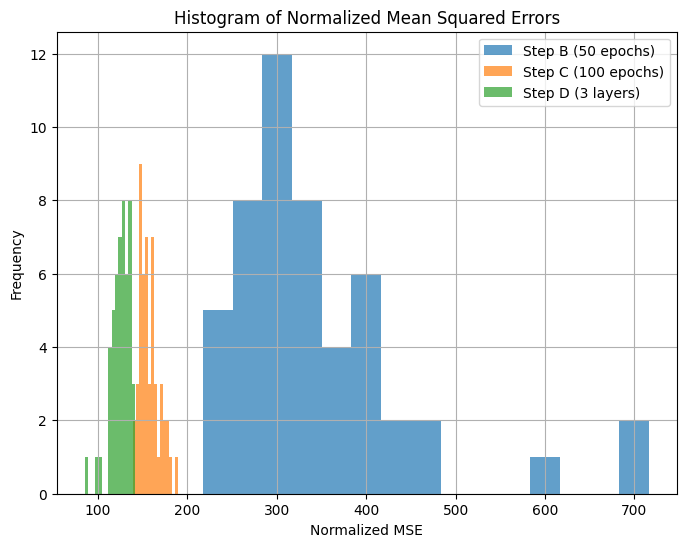

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(normalized_mse_list, bins=15, alpha=0.7, label='Step B (50 epochs)')
plt.hist(normalized_mse_list_100_epochs, bins=15, alpha=0.7, label='Step C (100 epochs)')
plt.hist(normalized_mse_list_three_layers, bins=15, alpha=0.7, label='Step D (3 layers)')
plt.title('Histogram of Normalized Mean Squared Errors')
plt.xlabel('Normalized MSE')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()
